In [0]:
import cv2
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
pathforw = 'gdrive/My Drive/W0001/'
pathforbb = 'gdrive/My Drive/10_img_post_cropped/'

In [0]:
aaa=[]
bbb=[]
for img in os.listdir(pathforw):
  if img.endswith('.png'):
    aaa.append(img)
for img in os.listdir(pathforbb):
  if 'bb' in img:
    bbb.append(img)

In [0]:
aaa = sorted(aaa)
bbb = sorted(bbb)
temp = bbb[1]
del(bbb[1])
bbb.append(temp)
markedimages = []
for i in range(len(bbb)):
  markedimages.append(cv2.imread(os.path.join(pathforbb,bbb[i]),0))
uncroppedimages = []
for i in range(len(aaa)):
  uncroppedimages.append(cv2.imread(os.path.join(pathforw,aaa[i]),0))
print(len(markedimages))

10


In [0]:
!cp '/content/gdrive/My Drive/W0001/ground_truth.txt' 'ground_truth.txt'

In [0]:
df = pd.read_csv('ground_truth.txt', sep="   ", header=None)
df.columns = ['id','x1','x2','y1','y2']
for index,row in df.iterrows():
  row['id'] = int(row['id'])
df.index = df['id']
df = df.drop(['id'],axis=1)
df['width'] = df['x2'] - df['x1']
df['height'] = df['y2'] - df['y1']
df1 = df.loc[1]
df1 = df1[['x1','x2','y1','y2','width','height']]
df1.reset_index()
newdf = df.copy()
newdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


x1    x2     y1     y2  width  height
id                                          
1.0   8.5  23.5  121.5  130.5   15.0     9.0
1.0   8.5  19.5  148.5  176.5   11.0    28.0
1.0   8.5  33.5  185.5  220.5   25.0    35.0
1.0   8.5  33.5  228.5  253.5   25.0    25.0
1.0  10.5  19.5  134.5  144.5    9.0    10.0

In [0]:
for i in range(len(aaa)):
  image = markedimages[i]
  image1 = uncroppedimages[i]
  res = cv2.matchTemplate(image1,image,eval('cv2.TM_CCOEFF_NORMED'))
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  top_left = max_loc
  newdf.loc[i+1]['x1'] = newdf.loc[i+1]['x1']-top_left[0]
  newdf.loc[i+1]['x2'] = newdf.loc[i+1]['x2']-top_left[0]
  newdf.loc[i+1]['y1'] = newdf.loc[i+1]['y1']-top_left[1]
  newdf.loc[i+1]['y2'] = newdf.loc[i+1]['y2']-top_left[1]
newdf.head()

x1    x2     y1     y2  width  height
id                                          
1.0 -33.5 -18.5   53.5   62.5   15.0     9.0
1.0 -33.5 -22.5   80.5  108.5   11.0    28.0
1.0 -33.5  -8.5  117.5  152.5   25.0    35.0
1.0 -33.5  -8.5  160.5  185.5   25.0    25.0
1.0 -31.5 -22.5   66.5   76.5    9.0    10.0

In [0]:
for index,row in newdf.iterrows():
  row['x1'] = max(0,row['x1'])
  row['x2'] = max(0,row['x2'])
  row['y1'] = max(0,row['y1'])
  row['y2'] = max(0,row['y2'])

In [0]:
for i in range(len(aaa)): 
  image = markedimages[i]
  #cv2_imshow(image)
  for index,row in newdf.loc[i+1].iterrows():
    x1 = row['x1']
    x2 = row['x2']
    y1 = row['y1']
    y2 = row['y2']
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,0,0),2)
  #cv2_imshow(image)

In [0]:
ccc = []
for img in os.listdir(pathforbb):
  if 'crp' in img:
    ccc.append(img)

In [0]:
ccc = sorted(ccc)
temp = ccc[1]
del(ccc[1])
ccc.append(temp)
croppedimages=[]
for i in range(len(ccc)):
  croppedimages.append(cv2.imread(os.path.join(pathforbb,ccc[i]),0))

In [0]:
newdf.head()

x1   x2     y1     y2  width  height
id                                        
1.0  0.0  0.0   53.5   62.5   15.0     9.0
1.0  0.0  0.0   80.5  108.5   11.0    28.0
1.0  0.0  0.0  117.5  152.5   25.0    35.0
1.0  0.0  0.0  160.5  185.5   25.0    25.0
1.0  0.0  0.0   66.5   76.5    9.0    10.0

In [0]:
binaryimages = []
testimages = []
for image in croppedimages:
  binaryimages.append(image)
  testimages.append(image)

In [0]:
for i in range(len(binaryimages)):
  binaryimages[i] = np.array(binaryimages[i])
  binaryimages[i][:] = 0

In [0]:
for i in range(len(binaryimages)):
  for index,row in newdf.loc[i+1].iterrows():
    x1 = row['x1']
    x2 = row['x2']
    y1 = row['y1']
    y2 = row['y2']
    cv2.rectangle(binaryimages[i],(int(x1),int(y1)),(int(x2),int(y2)),255, -1)
  cv2_imshow(binaryimages[i])
  cv2_imshow(markedimages[i])

In [0]:
newdf.loc[2.0]

In [0]:
testimage = []
binarytestimage = []
testimage.append(croppedimages[0])
binarytestimage.append(binaryimages[0])

In [0]:
del croppedimages[0]

In [0]:
del binaryimages[0]

In [0]:
X=[]
whitepixels=[]
for k in range(len(croppedimages)):
  print(k)
  i=64
  height = croppedimages[k].shape[0]
  width = croppedimages[k].shape[1]
  image = binaryimages[k]
  while(i<height):
    j=64
    while(j<width):
      X.append(croppedimages[k][i-64:i,j-64:j])
      count = 0
      for h in range(i-64,i):
        for w in range(j-64,j):
          if image[h][w] == 255:
            count+=1
      whitepixels.append(count)      
      j+=15
    i+=15
print(len(X))

0
1
2
3
4
5
6
7
8
92024


In [0]:
total = 64*64
threshold = total*0.4
print(threshold)

1638.4


In [0]:
labelpos = []
labelneg = []
Xpos= []
Xneg=[]
training_data=[]
poscount = 0
negcount = 0
for i in range(len(whitepixels)):
  if whitepixels[i]>= threshold:
    labelpos.append(1)
    poscount +=1
    Xpos.append(X[i])
  else:
    labelneg.append(0)
    negcount+=1
    Xneg.append(X[i])
print(poscount,negcount)
print(len(Xpos),len(Xneg))

4069 87955
4069 87955


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(       
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

In [0]:
!rm -r 'gdrive/My Drive/augment_test6'

In [0]:
!mkdir 'gdrive/My Drive/augment_test6'

In [0]:
print('Plus:',np.min(Xpos), np.max(Xpos))

print('neg:',np.min(Xneg), np.max(Xneg))

Plus: 0 238
neg: 2 240


In [0]:
k=0
for x in Xpos:
  x = x.reshape((1,) + x.shape)
  x = x.T
  x = x.reshape((1,) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=1,save_to_dir='gdrive/My Drive/augment_test6', save_prefix='aug'+str(k)+'img', save_format='jpeg'):
      i += 1
      if i > 20:
          break
  k+=1

In [0]:
Xaug = []
import os
i= 0
for image in os.listdir('gdrive/My Drive/augment_test6'):
  Xaug.append(cv2.imread(os.path.join('gdrive/My Drive/augment_test6',image),0))
  i+=1
  if i%100 ==0:
    print(i)
print(len(Xaug))

In [0]:
len(Xaug)

23896

In [0]:
XPos = Xpos+Xaug

In [0]:
len(XPos)

25035

In [0]:
labelpos = [1]*25035

In [0]:
len(labelpos)

9338

In [0]:
X = Xpos + Xneg
label = labelpos+labelneg

In [0]:
len(X),len(label)

(92024, 92024)

In [0]:
Xtest = Xpos[3069:]+Xneg[15030:16030]
labeltest = labelpos[3069:]+labelneg[15030:16030]
Xtrain  = Xpos[:3069] + Xneg[:15030]+Xneg[16030:]
labeltrain  = labelpos[:3069] + labelneg[:15030]+labelneg[16030:]

In [0]:
from sklearn.utils import shuffle
Xtrain, labeltrain = shuffle(Xtrain, labeltrain)
Xtest, labeltest = shuffle(Xtest, labeltest)

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPool2D,Input,Add
from keras.callbacks import ModelCheckpoint

In [0]:

Xtrain = np.array(Xtrain)
labeltrain = np.array(labeltrain)

In [0]:
Xtest = np.array(Xtest)
labeltest = np.array(labeltest)

In [0]:
len(Xtest)

0

In [0]:
len(Xtrain)

0

In [0]:
Xtrain = Xtrain.reshape(90024,64,64,1)

In [0]:
Xtest = Xtest.reshape(2000,64,64,1)
Xtest.shape

(2000, 64, 64, 1)

In [0]:
labeltest.shape

(2000,)

In [0]:
labeltrain.shape

(90024,)

In [0]:
Xtrain = Xtrain/255
Xtest = Xtest/255

In [0]:
def create_model():
  from keras.models import Model

  x = None

  input_s = Input(shape=(64,64,1))

  x = Conv2D(32 , (3,3) ,activation='relu')(input_s)
  #x = MaxPool2D(pool_size=(2,2))(x)
  x = BatchNormalization()(x)

  X_shortcut = x

  x = Conv2D(32 , (3,3),activation='relu',padding='same')(x)

  x = Conv2D(32,(3,3),activation='relu')(Add()([X_shortcut,x]))
  #x = MaxPool2D(pool_size=(2,2))(x)
  x = BatchNormalization()(x)
  
  x = Conv2D(64 , (3,3) ,activation='relu')(x)
  #x = MaxPool2D(pool_size=(2,2))(x)
  x = GlobalAveragePooling2D()(x)
  #x = Flatten()(x)

  x = Dense(1024,activation='relu')(x)
  x = Dropout(0.2)(x)

  x = Dense(1 , activation='sigmoid')(x)
  model = Model(inputs = input_s,outputs=x)
  return model

In [0]:
def model_compile_and_fit_and_evaluate(model,X_train,y_train,X_test,y_test):
  model.compile(loss = 'binary_crossentropy' , optimizer= 'adam' , metrics =['accuracy'])
  
  model.fit(X_train,y_train,epochs=10,batch_size = 32,shuffle=True)
  score = model.evaluate(X_test,y_test,batch_size=32)
  print(score)

In [0]:
import numpy as np
import keras.backend as K

def binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight):

    TN = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 0)
    TP = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 1)

    FP = np.logical_and(K.eval(y_true) == 0, K.eval(y_pred) == 1)
    FN = np.logical_and(K.eval(y_true) == 1, K.eval(y_pred) == 0)

    # Converted as Keras Tensors
    TN = K.sum(K.variable(TN))
    FP = K.sum(K.variable(FP))

    specificity = TN / (TN + FP + K.epsilon())
    recall = TP / (TP + FN + K.epsilon())

    return 1.0 - (recall_weight*recall + spec_weight*specificity)

In [0]:
def custom_loss(recall_weight, spec_weight):

    def recall_spec_loss(y_true, y_pred):
        return binary_recall_specificity(y_true, y_pred, recall_weight, spec_weight)

    # Returns the (y_true, y_pred) loss function
    return recall_spec_loss

In [0]:
model = create_model()


#closs = custom_loss(recall_weight=0.9, spec_weight=0.1)
class_weight = {0:0.2,1:0.8}
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics =['accuracy'])
filepath="weights-improvement-binary-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
model.fit(Xtrain,labeltrain,batch_size=32,epochs=10,callbacks=callbacks_list,validation_split=0.1,shuffle=True,class_weight=class_weight)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 81021 samples, validate on 9003 samples
Epoch 1/10
81021/81021 [==============================] - 53s 652us/step - loss: 0.0535 - acc: 0.9689 - val_loss: 1.8459 - val_acc: 0.3760

Epoch 00001: val_loss improved from inf to 1.84591, saving model to weights-improvement-binary-01-0.38.hdf5
Epoch 2/10
81021/81021 [==============================] - 49s 611us/step - loss: 0.0444 - acc: 0.9708 - val_loss: 0.1050 - val_acc: 0.7229

Epoch 00002: val_loss improved from 1.84591 to 0.10503, saving model to weights-improvement-binary-02-0.72.hdf5
Epoch 3/10
81021/81021 [==============================] - 50s 613us/step - loss: 0.0401 - acc: 0.9708 - val_loss: 0.2316 - val_acc: 0.9715

Epoch 00003: val_loss did not improve from 0.10503
Epoch 4/10
81021/81021 [=

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(Xtrain, labeltrain):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = Xtrain[train_index], Xtrain[test_index]
  y_train, y_test = labeltrain[train_index], labeltrain[test_index]
  model = create_model()
  model = model_compile(model)
  model_compile_and_fit_and_evaluate(model,X_train,y_train,X_test,y_test)  

In [0]:
posc = 0
negc = 0
for nuuu in labeltest:
  if nuuu==1:
    posc +=1
  else:
    negc+=1
print(posc,negc)

1000 1000


In [0]:
posc = 0
negc = 0
for nuuu in labeltest:
  if nuuu[0]==1 and nuuu[1]==0:
    posc +=1
  else:
    negc+=1
print(posc,negc)

In [0]:
model = create_model()

model.load_weights('weights-improvement-binary-10-0.97.hdf5')
model.compile(loss = 'binary_crossentropy' , optimizer= 'adam' , metrics =['accuracy'])
model.evaluate(Xtest,labeltest,batch_size=32)

2000/2000 [==============================] - 1s 322us/step


[2.1201936111450195, 0.609]

In [0]:
conpredictions = model.predict(Xtest,batch_size=32)

In [0]:
print(conpredictions[:10])

[[2.9563904e-05]
 [4.4678277e-01]
 [8.9776516e-04]
 [5.7521462e-04]
 [1.2012422e-03]
 [1.7545819e-03]
 [9.9176645e-02]
 [1.1295497e-02]
 [1.0918975e-03]
 [8.5803866e-03]]


In [0]:
y_actual = []
y_predict = []
for i in range(len(conpredictions)):
  if conpredictions[i]>0.01:
    y_predict.append(1)
  else:
    y_predict.append(0)
  if labeltest[i]==1:
    y_actual.append(1)
  else:
    y_actual.append(0)

In [0]:
y_actual = []
y_predict = []
for i in range(len(conpredictions)):
  if conpredictions[i][0] > conpredictions[i][1]:
    y_predict.append(1)
  else:
    y_predict.append(0)
  if labeltest[i][0] > labeltest[i][1]:
    y_actual.append(1)
  else:
    y_actual.append(0)

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
results = confusion_matrix(y_actual, y_predict) 
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_actual,y_predict) )
print ('Report : ')
print (classification_report(y_actual, y_predict) )

Confusion Matrix :
[[1000    0]
 [ 311  689]]
Accuracy Score : 0.8445
Report : 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1000
           1       1.00      0.69      0.82      1000

    accuracy                           0.84      2000
   macro avg       0.88      0.84      0.84      2000
weighted avg       0.88      0.84      0.84      2000



In [0]:
finalimage = testimage[0].copy()

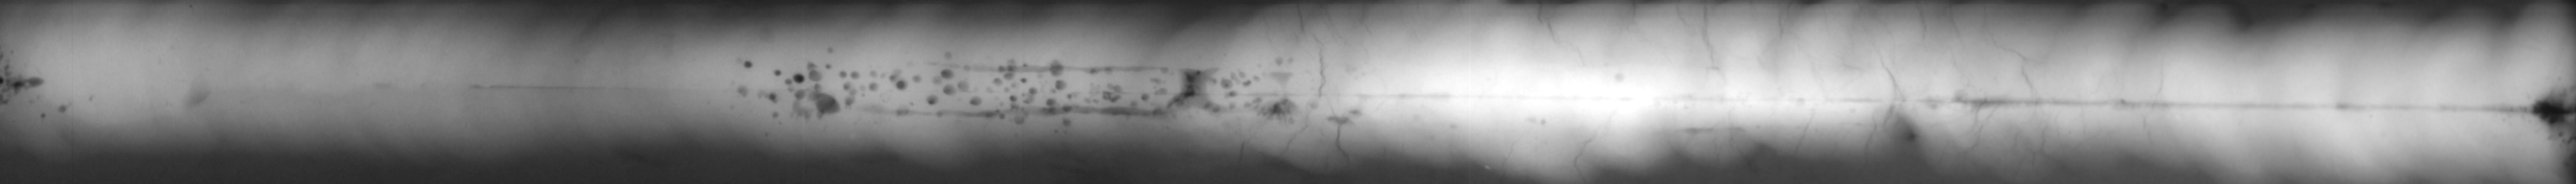

In [0]:
cv2_imshow(finalimage)

In [0]:
h = finalimage.shape[0]
w = finalimage.shape[1]
h,w

(248, 3470)

In [0]:
finalbinary = binarytestimage[0].copy()

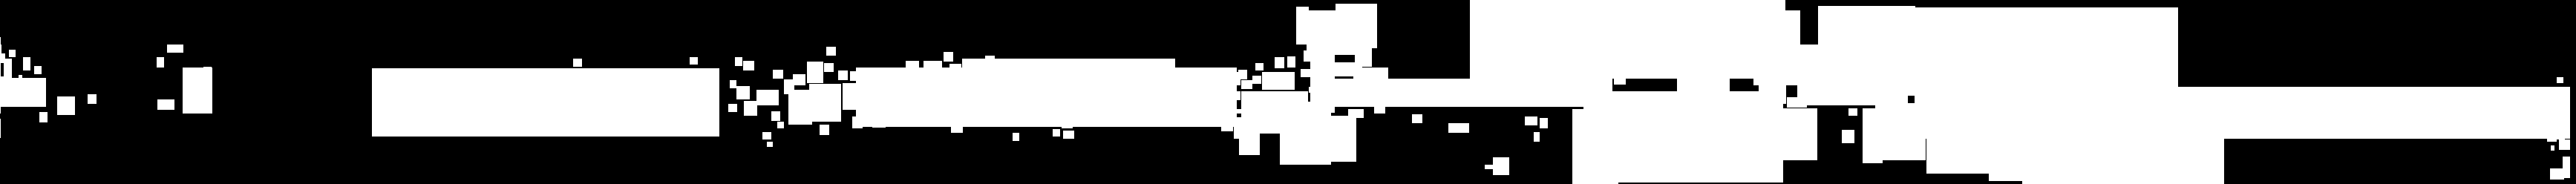

In [0]:
cv2_imshow(finalbinary)

In [0]:
i = 64
simages=[]
while(i<h):
  j=64
  while(j<w):
    simages.append(finalimage[i-64:i,j-64:j])
    j+=15
  print(j)
  i+=15
len(simages)
print(i,j)

3484
3484
3484
3484
3484
3484
3484
3484
3484
3484
3484
3484
3484
259 3484


In [0]:
for i in range(len(simages)):
  cv2_imshow(simages[i])

In [0]:
Xpredict = np.array(simages)
Xpredict = Xpredict.reshape(2964,64,64,1)
Xpredict.shape

(2964, 64, 64, 1)

In [0]:
Xpredict = Xpredict/255

In [0]:
predictions = model.predict(Xpredict,batch_size=32)

In [0]:
len(predictions)

2964

In [0]:
preds=[]
for i in range(len(predictions)):
  if predictions[i]>0.1:
    preds.append(1)
  else:
    preds.append(0)

In [0]:
preds=[]
for i in range(len(predictions)):
  if predictions[i][0]>predictions[i][1]:
    preds.append(1)
  else:
    preds.append(0)

In [0]:
print(preds)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
print(h,w)
wp = []
i=64
while(i<h):
  
  j=64
  while(j<w):
    count = 0
    for l in range(i-64,i):
      for m in range(j-64,j):
        if finalbinary[l][m] == 255:
          count+=1
        
    wp.append(count) 
    j+=15
  i+=15
print(len(wp))

248 3470
2964


In [0]:
res = []
for i in range(len(wp)):
  if wp[i]>threshold:
    res.append(1)
  else:
    res.append(0)

In [0]:
print(res)
preds = (list(preds))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

tn, fp, fn, tp

In [0]:
print(len(preds))

2964


In [0]:
preds = np.array(preds)
preds = preds.reshape(13,228)

In [0]:
with open('list.txt', 'w') as file_handler:
    for item in preds:
        file_handler.write("{}\n".format(item))

In [0]:
results = confusion_matrix(res, preds) 
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(res, preds) )
print ('Report : ')
print (classification_report(res, preds) )
print(results.ravel())

Confusion Matrix :
[[1003  317]
 [ 903  741]]
Accuracy Score : 0.5883940620782726
Report : 
              precision    recall  f1-score   support

           0       0.53      0.76      0.62      1320
           1       0.70      0.45      0.55      1644

    accuracy                           0.59      2964
   macro avg       0.61      0.61      0.59      2964
weighted avg       0.62      0.59      0.58      2964

[1003  317  903  741]


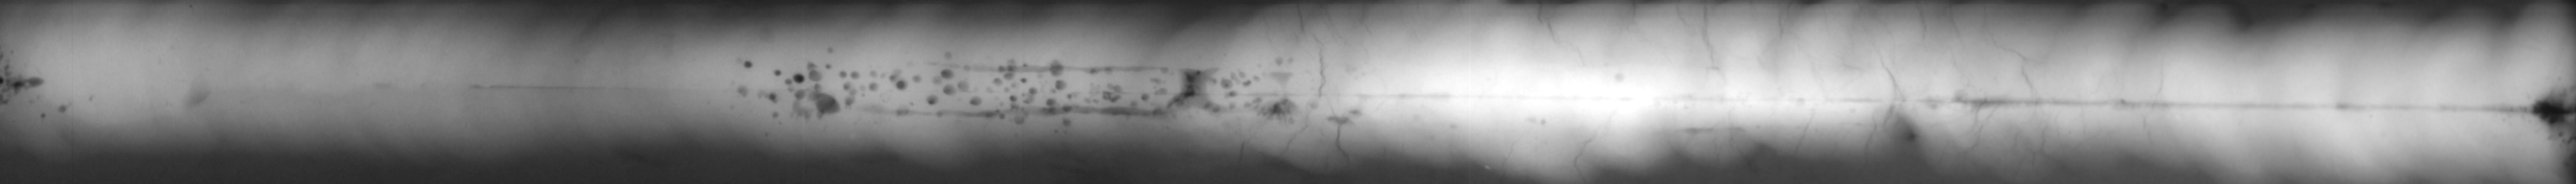

In [0]:
cv2_imshow(finalimage)

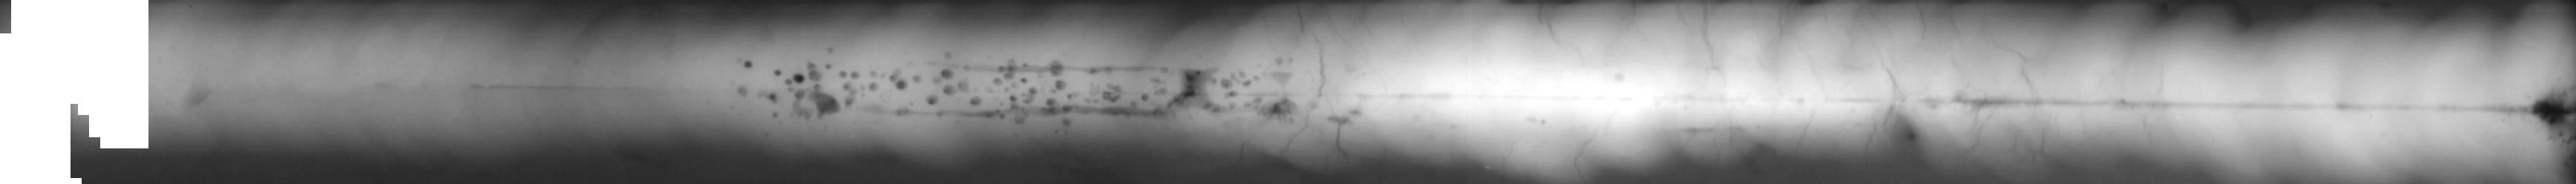

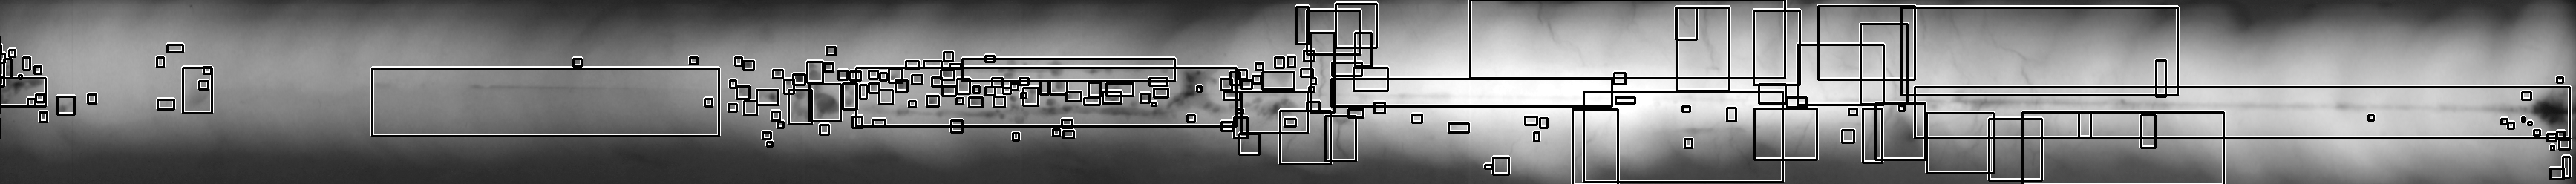

(248, 3470)


In [0]:
h = finalimage.shape[0]
w = finalimage.shape[1]
k=0
i = 64
while(i<h):
  j=64
  while(j<w):
    if preds[k] == 1:
      cv2.rectangle(finalimage,(i-64,j-64),(i,j),255,-1)
    k+=1
    j+=15
  i+=15
cv2_imshow(finalimage)
cv2_imshow(markedimages[0])
print(markedimages[0].shape)

In [0]:
for i in range(len(simages)):
  if (preds[i]==0 and res[i] == 1) or (preds[i]==1 and res[i] == 0):
    cv2_imshow(simages[i])

In [0]:
cnt=0
for i in range(len(Xtest)):
  if (y_actual[i]==0 and y_predict[i] == 1) or (y_actual[i]==1 and y_predict[i] == 0):
    imge = Xtest[i].copy()
    cnt+=1
    imge = imge*255
    imge = imge.reshape(64,64)
    cv2_imshow(imge)
print(cnt,i)

In [0]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32, 3))

In [0]:
base_model.summary()

In [0]:
keras_input = Input(shape=(32,32,3), name = 'image_input')

In [0]:
output_vgg16_model = base_model(keras_input)

In [0]:
Xtrain = Xtrain.reshape(20000,32,32)

In [0]:
Xtrain.shape

(20000, 32, 32)

In [0]:
rgb_batch = np.repeat(Xtrain[..., np.newaxis], 3, -1)

In [0]:
rgb_batch.shape

(20000, 32, 32, 3)

In [0]:
from keras.models import Model
xm = Flatten(name='flatten')(output_vgg16_model)
xm = Dense(4096, activation='relu', name='fc1')(xm)
xm = Dense(512, activation='relu', name='fc2')(xm)
xm = Dense(1, activation='sigmoid', name='predictions')(xm)
pretrained_model = Model(inputs=keras_input, outputs=xm)

In [0]:
for layer in pretrained_model.layers[0:20]:
    layer.trainable = False

In [0]:
pretrained_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam',metrics=['accuracy'])

In [0]:
class_weight = {0:0.2,1:0.8}
pretrained_model.fit(rgb_batch,labeltrain,shuffle=True,epochs=10,batch_size=32,class_weight=class_weight)

Epoch 1/10
20000/20000 [==============================] - 6s 284us/step - loss: 0.1387 - acc: 0.9492
Epoch 2/10
20000/20000 [==============================] - 6s 279us/step - loss: 0.1387 - acc: 0.9492
Epoch 3/10
20000/20000 [==============================] - 6s 279us/step - loss: 0.1387 - acc: 0.9492
Epoch 4/10
20000/20000 [==============================] - 6s 280us/step - loss: 0.1387 - acc: 0.9492
Epoch 5/10
20000/20000 [==============================] - 6s 281us/step - loss: 0.1387 - acc: 0.9492
Epoch 6/10
20000/20000 [==============================] - 6s 282us/step - loss: 0.1387 - acc: 0.9492
Epoch 7/10
20000/20000 [==============================] - 6s 284us/step - loss: 0.1387 - acc: 0.9492
Epoch 8/10
20000/20000 [==============================] - 6s 285us/step - loss: 0.1387 - acc: 0.9492
Epoch 9/10
20000/20000 [==============================] - 6s 286us/step - loss: 0.1387 - acc: 0.9492
Epoch 10/10
20000/20000 [==============================] - 6s 286us/step - loss: 0.1387 - a

In [0]:
Xtest = Xtest.reshape(2146,32,32)
test_batch = np.array(np.repeat(Xtest[..., np.newaxis], 3, -1))
conpredictions = pretrained_model.predict(test_batch,labeltest,batch_size=32)

TypeError: ignored

In [0]:
y_actual = []
y_predict = []
for i in range(len(conpredictions)):
  if conpredictions[i]>0.25:
    y_predict.append(1)
  else:
    y_predict.append(0)
  if labeltest[i]==1:
    y_actual.append(1)
  else:
    y_actual.append(0)

In [0]:
results = confusion_matrix(res, preds) 
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(res, preds) )
print ('Report : ')
print (classification_report(res, preds) )
print(results.ravel())